# Lorenz Equations

This notebook looks at numerical solutions of the Lorenz equations. 

The equations are:

$\dfrac{dx}{dt} = \sigma (y - x)$

$\dfrac{dy}{dt} = x(r - z) - y$

$\dfrac{dz}{dt} = xy - bz$

### Solving the equations

These equations can be reformulated into the following matrix form:

$\dfrac{d\mathbf{X}}{dt} = \mathbf{f}(t,\mathbf{X})$

They can then be solved numerially via the RK4 method with the numpy library.




In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

The following defines the fundamental constants, the simulation parameters and defines the RK4 iterator.

In [27]:
#constants
sigma = 10
b = 8/3
r = 28

#simulation parameter
h = .001
N = 10**5

In [28]:
def iterateRK4(t_n,y_n,f):
    """ 
    Finds y(t_n+h) for the equation dy/dt = f(t,y) via RK4 method.
    """
    k_1 = f(t_n, y_n)
    k_2 = f(t_n + h/2, y_n + h*k_1/2)
    k_3 = f(t_n + h/2, y_n + h*k_2/2)
    k_4 = f(t_n + h, y_n + h*k_3)

    return y_n + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

Using the iterator above, the following functions can be used to find solutions to the lorenz equations. 

In [29]:


def f(t,R):
    """
    Returns the f(t,R) vector for the lorenz equations.
    """
    x = R[0]
    y = R[1]
    z = R[2]
    f_x = sigma*(y - x)
    f_y = r*x - y - x*z
    f_z = x*y - b*z
    return np.array([f_x,f_y,f_z])

def simulateLorenz(R_0):
    """
    Uses RK4 method to find a set of points on the solution to the Lorenz eq given an intial condition.
    """
    Rs = np.empty([N,3])
    ts = np.empty(N)

    Rs[0] = R_0
    ts[0] = 0


    for i in range(N-1):
        Rs[i+1] = iterateRK4(ts[i],Rs[i],f)
        ts[i+1] = ts[i]+h
        
    return ts, Rs


This is a simple numerical solution.

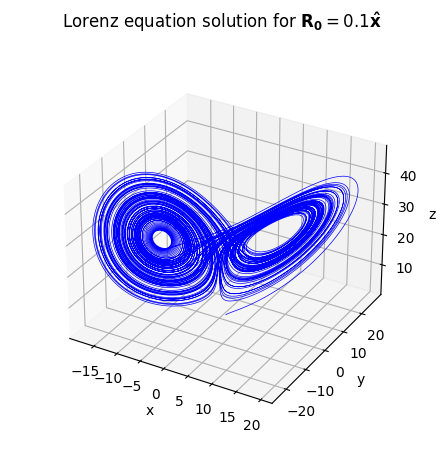

In [30]:
#example simulation
t1, R1 = simulateLorenz(np.array([1,1,1]))
x1, y1, z1 = R1[:,0], R1[:,1], R1[:,2]

#graph
ax1 = plt.axes(projection='3d')
ax1.plot3D(x1, y1, z1, 'blue',linewidth = '.5')
ax1.set_zlabel("z")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_box_aspect(None, zoom=0.85)
ax1.set_title(r'Lorenz equation solution for $\mathbf{R_0}=0.1\mathbf{\hat{x}}$')
plt.tight_layout()
plt.show()

### Demonstrating chaos and the Lyapunov exponent

The lorenz equations are an example of a chaotic system. This means the system is sensitive to initial conditions. This can be simply demonstrated by looking at how the distance between different trajectories evolves with time. 

In [31]:
#finds another simulation with close intial condition
delta = 10**(-6)
t2,R2 = simulateLorenz(np.array([1+delta,1,1]))

#finds deviation between 2 trajectories over time
deviations = [np.linalg.norm(R1[i][2]-R2[i][2]) for i in range(len(R1))]

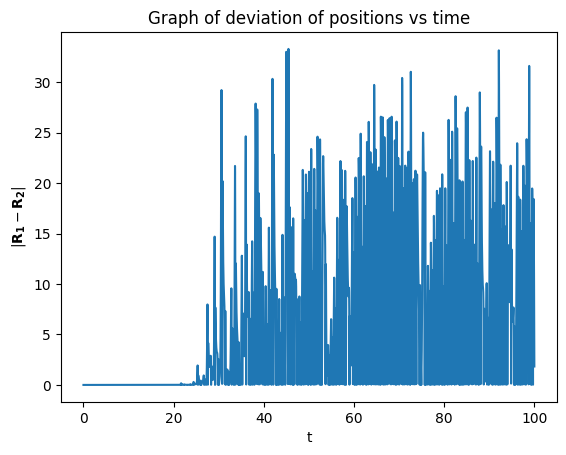

In [32]:

#plots deviation
plt.plot(t1,deviations)
plt.xlabel("t")
plt.ylabel(r'$|\mathbf{R_1} - \mathbf{R_2}|$')
plt.title("Graph of deviation of positions vs time")
plt.show() 


Every dynamical system has a Maximal Lyapunov exponent ($\lambda$). This characterizes the divergence of trajectories maximal distance in the linearization region. It turns out that:

$|\delta{X}(t)_{max}| \approx |\delta{X}(0)| e^{\lambda (t - t_0)} $

Taking the natural log of these equations gives:

$ln(|\delta{X}(t)_{max}|) \approx ln(|\delta{X}(0)|) + \lambda (t - t_0) $

The graph of this equation bellow clearly shows this type of evolution in the [16,24] region.

C:\Users\willi\AppData\Local\Temp\ipykernel_8528\2206551514.py:1: RuntimeWarning: divide by zero encountered in log
  logDevs = np.log(deviations)


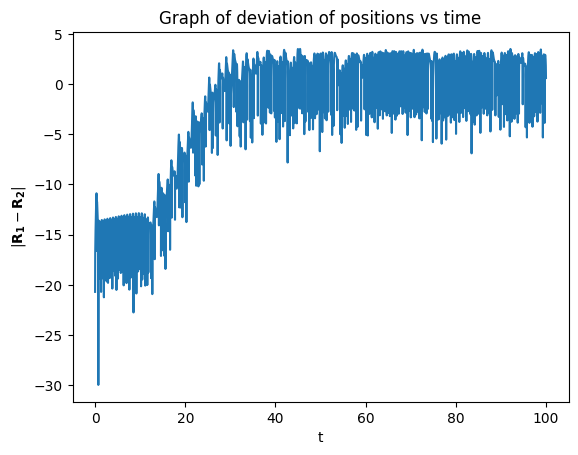

In [33]:
logDevs = np.log(deviations)
plt.plot(t1,logDevs)
plt.xlabel("t")
plt.ylabel(r'$|\mathbf{R_1} - \mathbf{R_2}|$')
plt.title("Graph of deviation of positions vs time")
plt.show() 


The following code finds an approximate value of $\lambda$ by least squares fitting.

In [40]:
#linear region
t1linear = t1[int(N/8):int(N/4)]
logDevLinear = logDevs[int(N/8):int(N/4)]

#find slope by least squares fitting 
slope, intercept, r_value, p_value, std_err = stats.linregress(t1linear,logDevLinear)
print(f"Lambda: {slope}")


Lambda: 0.9193187811027003


### Structure in Chaos

Successive maxima in the $z$ component have a definate structure. If $z_n$ is the $n^{th}$ maxima of z(t) then $z_{n+1}$ is exactly determined by the "tent" map. The following code reproduces this map. 

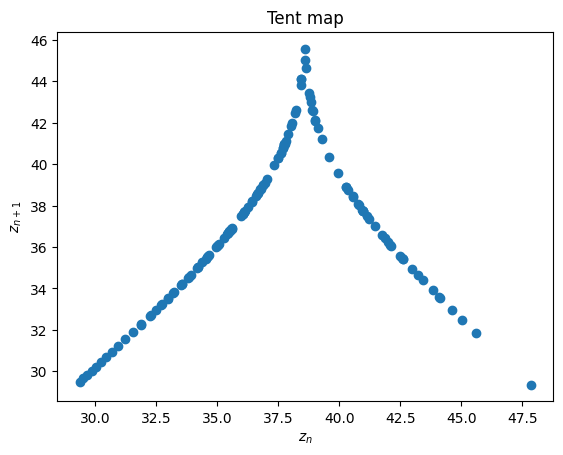

In [35]:
def maxima(i,lst):
    """
    Function that returns true if lst[i] is a maxima of the list.
    """
    if i == 0 or i == 1 or i == len(lst) - 1 or i == len(lst):
        return False
    return (lst[i-1]<lst[i]) and (lst[i]>lst[i+1])

maximas = [m for i,m in enumerate(z1) if maxima(i,z1)]

z_n = maximas[:-1]
z_n1 = maximas[1:]
plt.scatter(z_n,z_n1)
plt.xlabel(r"$z_n$")
plt.ylabel(r"$z_{n+1}$")
plt.title("Tent map")
plt.show()
